# Contrôle TP D
A l’issue de l’évaluation, vous devez déposer le notebook, sous le nom **contDnomprenom.ipynb** dans **dépôt évaluation TP**

*Source des données : Paulo Cortez, Université du Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez*  

**Fichier : donneesD.csv**  
Ces données portent sur les résultats des élèves de l'enseignement secondaire de deux écoles portugaises. Les variables que nous avons retenues dans ce fichier (les colonnes, dans le fichier, ne respectent pas forcément le même ordre):
* **sexe** : sexe de l'élève (binaire : 'F' - femme ou 'M' - homme)
* **age** : âge de l'étudiant (numérique : de 15 à 22)
* **Medu** : niveau d'éducation de la mère (numérique : 0 - aucun, 1 - enseignement primaire, 2 – Collège, 3 – Lycée ou 4 – enseignement supérieur) 
* **Pedu** : éducation du père (numérique : 0 - aucun, 1 - enseignement primaire, 2 – Collège, 3 – Lycée ou 4 – enseignement supérieur)
* **tempstrajet** :  temps de trajet domicile-école (numérique : 1 - <15 min., 2 - 15 à 30 min., 3 - 30 min. à 1 heure ou 4 - >1 heure)
* **tempsetude** : temps d'étude hebdomadaire (numérique : 1 - <2 heures, 2 - 2 à 5 heures, 3 - 5 à 10 heures ou 4 - >10 heures)
* **redoublement** : nombre de redoublements antérieurs (numérique : n si 1<=n<3, sinon 4)
* **courspart** : l’élève bénéficie de cours particuliers (binaire : oui ou non)
* **activites** : activités extrascolaires (binaire : oui ou non)
* **famrel** : qualité des relations familiales (numérique : de 1 - très mauvaise à 5 - excellente)
* **sante** : état de santé actuel (numérique : de 1 - très mauvais à 5 - très bon)
* **absences** : nombre d'absences scolaires (numérique : de 0 à 93)
* **note1** : note de première période (numérique : de 0 à 20) 
* **note2** : note de deuxième période (numérique : de 0 à 20) 
* **resultat** : validation du cours (validé ou pas validé)
  
Nous allons, à partir de ces données, construire des arbres de décision/régression. 
IMPORTANT :
Les variables cibles sont **note1**, **note2** et **resultat**.
Les variables explicatives sont les autres variables.  
**Remarque :** les variables **note1, note2** et **resultat** ne doivent pas être utilisées comme **variables explicatives**


# Arbre de régression
**Importer les données sous Python et construire un arbre de régression, la variable cible étant la variable note2.** 

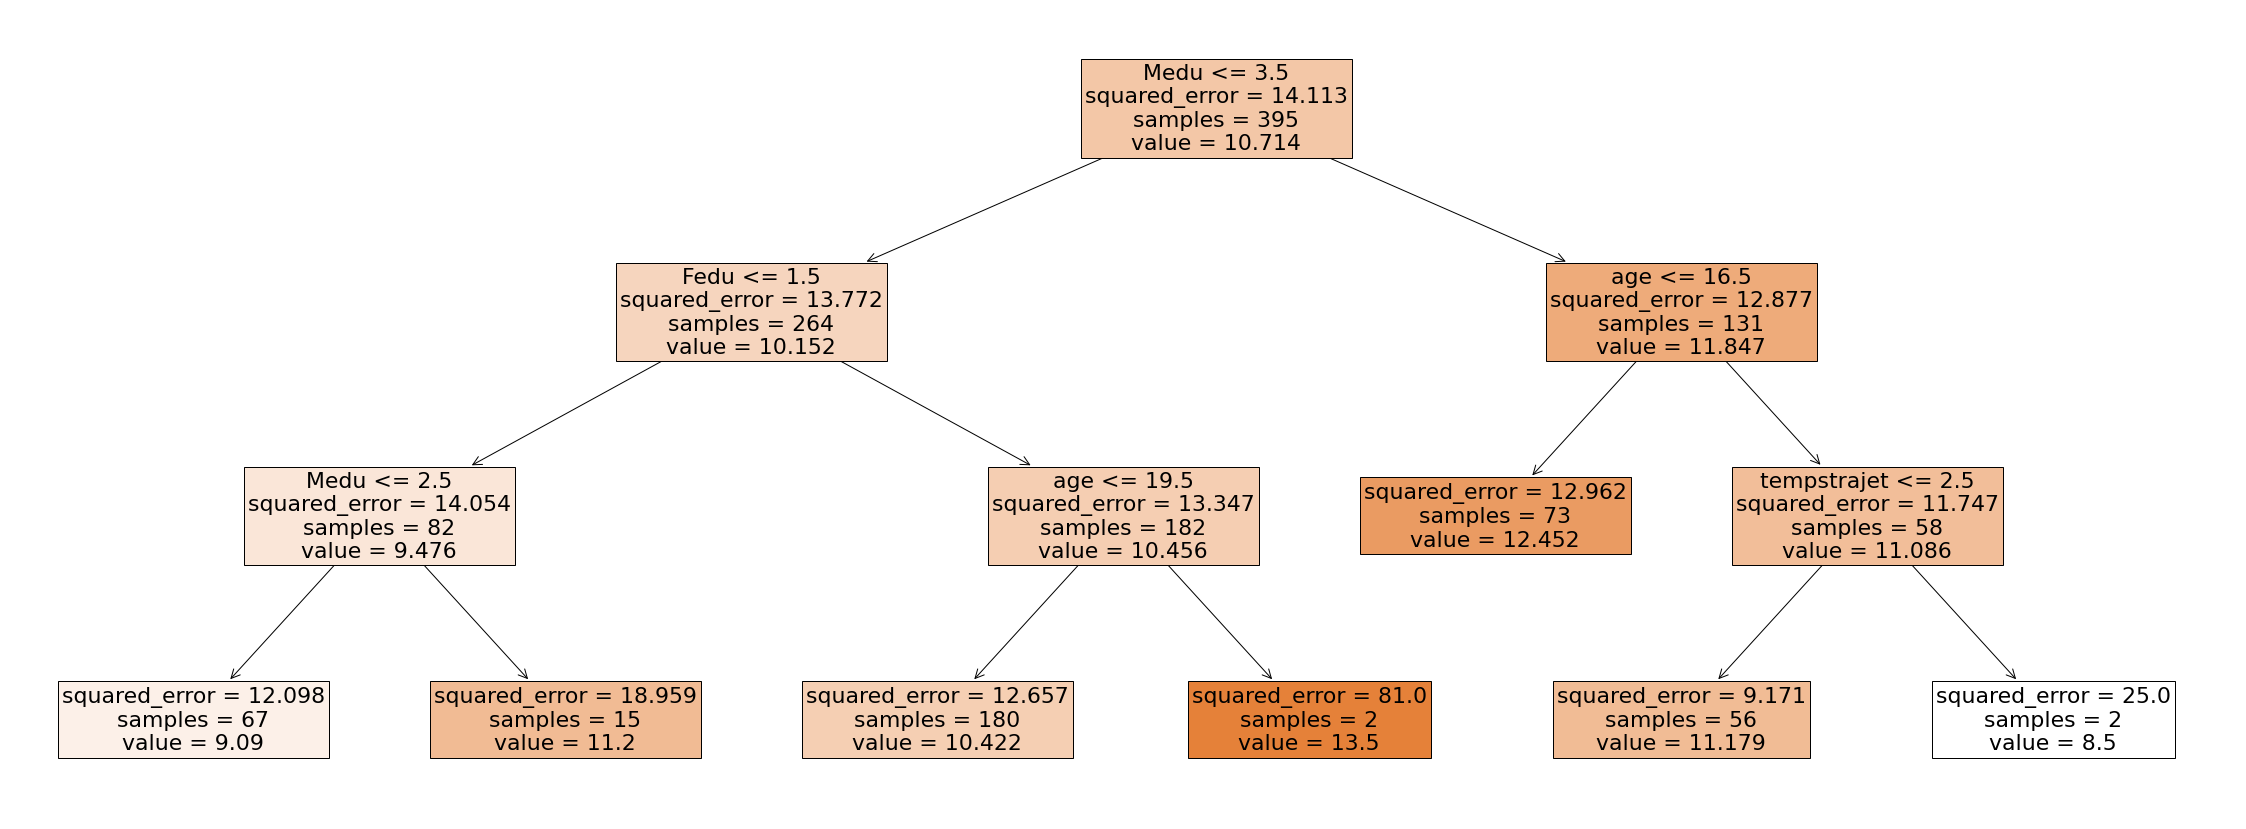

In [40]:
import numpy as np					        # Pour la manipulation de tableaux
import pandas as pd					        # Pour l’importation des données
import matplotlib.pyplot as plt				# Pour l’affichage de l’arbre
import os		

os.chdir('C:\\Users\\maxmo\\OneDrive - IUT de Bayonne\\Documents\\BUT_Info\\Annee2\\S4\\R4_04_Methodes_Optimisation\\eval')

donnees = pd.read_table('DonneesD.csv', sep = ';', decimal = ',', encoding = 'ANSI') #importation des données du fichier

#definition de la cible note2
cible = donnees['note2']
explicatives = donnees.iloc[:,[1,2,5,6]]
explicatives.head()

from sklearn.tree import DecisionTreeRegressor

#Représentation graphique de l’arbre

class_arbre = DecisionTreeRegressor(max_depth = 3, min_samples_leaf=2)
# Calcul des informations de l’arbre dans digit_free
digit_tree = class_arbre.fit(explicatives, cible)

#Représentation graphique de l’arbre
plt.figure(figsize = (40,15))  # set plot size (denoted in inches)
plot_tree(digit_tree, 
          fontsize = 22,
          filled=True,
          feature_names=list(explicatives.columns))
plt.show()

# Arbre de décision
Nous travaillons sur les mêmes données.  
Importer les données sous Python (si vous ne l’avez pas déjà fait) et construire un arbre de décision, la variable cible étant la variable **resultat**. 

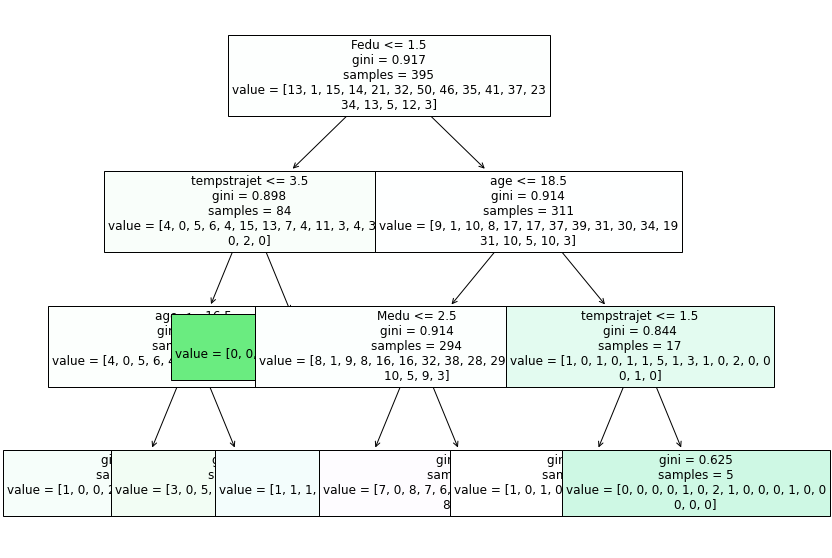

In [71]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

donnees = pd.read_table('DonneesD.csv', sep = ';', decimal = ',', encoding = 'ANSI') #importation des données du fichier

modalites_res = donnees["resultat"].unique()
modalites_res

dic_res = {}
i=1
for mod in modalites_res: 
    dic_res[mod] = i
    i = i+1

dic_res
donnees['resultat'].replace(dic_res, inplace = True)

# séparation des variables explicatives et des variables cibles
variables_explicatives = donnees.iloc[:,12:14]
variable_cible = donnees['resultat']


class_arbre = DecisionTreeClassifier(max_depth = 3, min_samples_leaf=5)

digit_tree = class_arbre.fit(explicatives, cible)

#Visualisation de l’arbre
plt.figure(figsize = (12,10))
plot_tree(digit_tree, fontsize = 12, filled=True, feature_names= list(explicatives.columns))
plt.show()

Vérifiez les valeurs obtenues sur les trois premiers nœuds de l’arbre : 

In [33]:
donnees.head()

,ï»¿sexe,age,Fedu,note1,note2,Medu,tempstrajet,tempsetude,redoublement,courspart,activites,famrel,sante,absences,resultat
0,F,18,4,5,6,4.0,2,2,0,yes,no,4,3,6,non validÃ©
1,F,17,1,5,5,1.0,1,2,0,no,no,5,3,4,non validÃ©
2,F,15,1,7,8,1.0,1,2,3,yes,no,4,3,10,validÃ©
3,F,15,2,15,14,4.0,1,3,0,no,yes,3,5,2,validÃ©
4,F,16,3,6,10,3.0,1,2,0,no,no,4,5,4,validÃ©


Calculer le **gain de pureté de Gini** associé à cette première division